<a href="https://colab.research.google.com/github/NamanChaudhary1/DailyAssignments/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advance** **Python Assignment** 

Part 2 (Data Analytics)

# Q12

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Set random seed for reproducibility

In [2]:
np.random.seed(42)

Generate random dataset

In [ ]:
dataset = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(dataset)
df

(i) Replace values with NA in the range [10, 60]

In [ ]:
df.iloc[10:61] = np.nan
missing_rows = df.isna().any(axis=1).sum()
print("Number of rows with missing values:", missing_rows)

(ii) Replace NA values with column averages

In [6]:
df = df.fillna(df.mean())

(iii) Calculate Pearson correlation and plot heat map

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Pearson Correlation Heat Map")
plt.show()

Select columns with correlation <= 0.7

In [ ]:
selected_columns = correlation.columns[(correlation <= 0.7).any()]
print("Columns with correlation <= 0.7:", selected_columns)

(iv) Normalize values between 0 and 10

In [9]:
df_normalized = (df - df.min()) / (df.max() - df.min()) * 10

(v) Replace values with 1 if <= 0.5, else with 0

In [ ]:
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)

# Q13

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
np.random.seed(42)

In [12]:
columns = {
    'Column1': np.random.uniform(-10, 10, size=500),
    'Column2': np.random.uniform(-10, 10, size=500),
    'Column3': np.random.uniform(-10, 10, size=500),
    'Column4': np.random.uniform(-10, 10, size=500),
    'Column5': np.random.uniform(10, 20, size=500),
    'Column6': np.random.uniform(10, 20, size=500),
    'Column7': np.random.uniform(10, 20, size=500),
    'Column8': np.random.uniform(10, 20, size=500),
    'Column9': np.random.uniform(-100, 100, size=500),
    'Column10': np.random.uniform(-100, 100, size=500)
}

df = pd.DataFrame(columns)

K-Means Clustering

In [15]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

Plot elbow curve

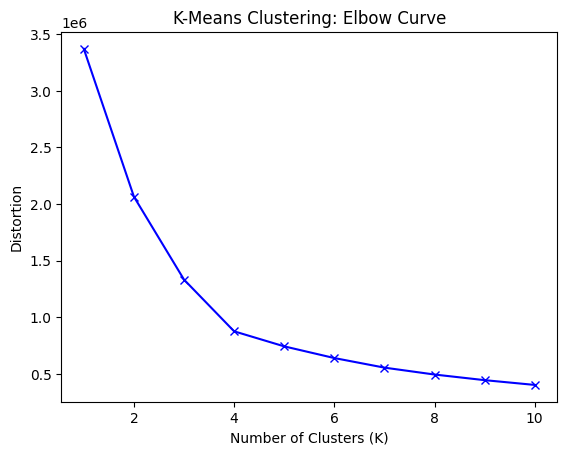

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('K-Means Clustering: Elbow Curve')
plt.show()

In [18]:
k = 3  # Set the chosen number of clusters
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(df)
labels_kmeans = kmeans.labels_


Hierarchical Clustering

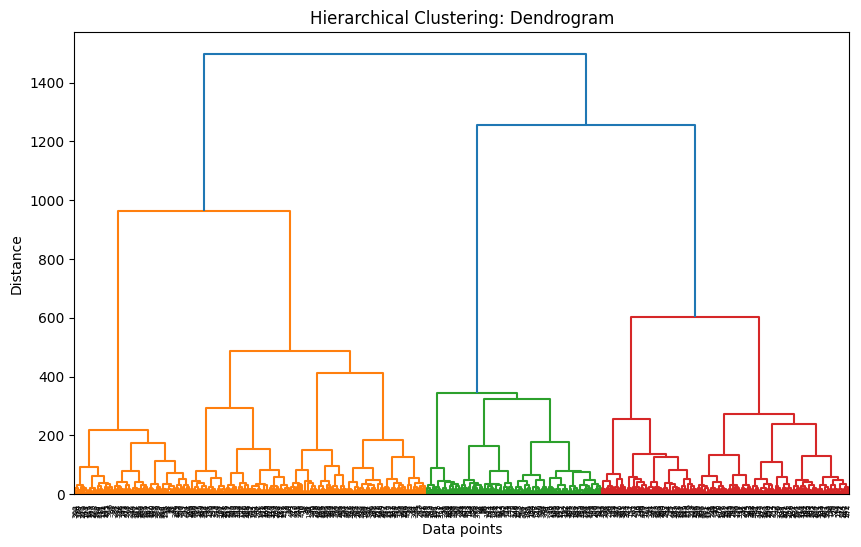

In [27]:
linkage_matrix = linkage(df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Q14

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Set random seed

In [29]:
np.random.seed(50)

Generate Data Frame

In [33]:
data = np.random.uniform(-100,100,size = (600,15))
columns = [f'Column{i}' for i in range (1,16)]
df = pd.DataFrame(data,columns=columns)
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,51.708996,26.464341,90.546736,-16.070758,12.056114,18.585055,-77.877475,80.787835,29.907471,27.539012,-63.501382,-39.146351,1.277434,85.621929,-98.261972
1,73.453810,-10.686638,94.612416,5.471484,-29.570928,33.854818,-73.737200,-88.355129,-18.971473,50.447651,37.674566,14.295190,26.161081,15.740675,79.988277
2,-42.641592,-26.886904,13.904808,69.870166,46.214357,-70.967005,-75.527425,70.357089,-14.797219,0.817863,33.925325,53.307410,61.584625,-29.726521,-2.189660
3,36.640260,-26.185113,65.731958,-83.510411,-60.064367,81.951043,65.709401,-35.350155,-7.932264,70.144988,8.250392,74.081810,-0.316502,35.972292,-72.015482
4,82.031675,-8.612893,-81.687561,-21.922777,17.800889,16.627454,-78.892789,-27.036270,60.026716,-10.060411,28.503133,22.202036,-42.744765,-73.705784,27.113863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,52.519605,41.008534,-94.046809,-52.687829,-90.957048,-8.004113,68.184914,-17.186755,-77.420091,23.281054,37.781051,-90.081131,13.072119,-25.229216,-43.587828
596,-76.029391,82.579325,-77.861450,-21.651802,-50.236839,-22.451377,64.746148,28.943765,40.195183,-37.422708,-48.703324,-22.602151,-35.716338,-56.760374,-33.641986
597,32.135479,9.537537,93.474451,20.613318,41.406497,-56.197088,-23.869312,58.159996,22.381285,-37.355884,-21.692384,13.368484,-27.037811,-93.788835,-98.847248
598,5.767222,79.463600,98.965418,19.149679,-36.884604,-3.244422,28.840262,69.475104,-36.787361,69.111801,86.075932,61.541818,-95.836054,76.803340,0.539956


(i) plot scatter between Column 5 and Column 6

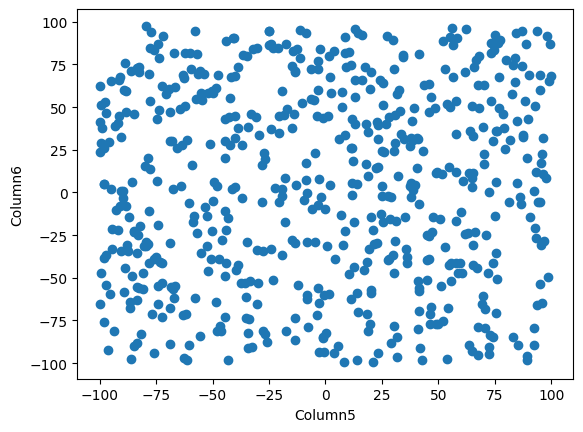

In [34]:
plt.scatter(df['Column5'],df['Column6'])
plt.xlabel('Column5')
plt.ylabel('Column6')
plt.show()

(ii)Histogram

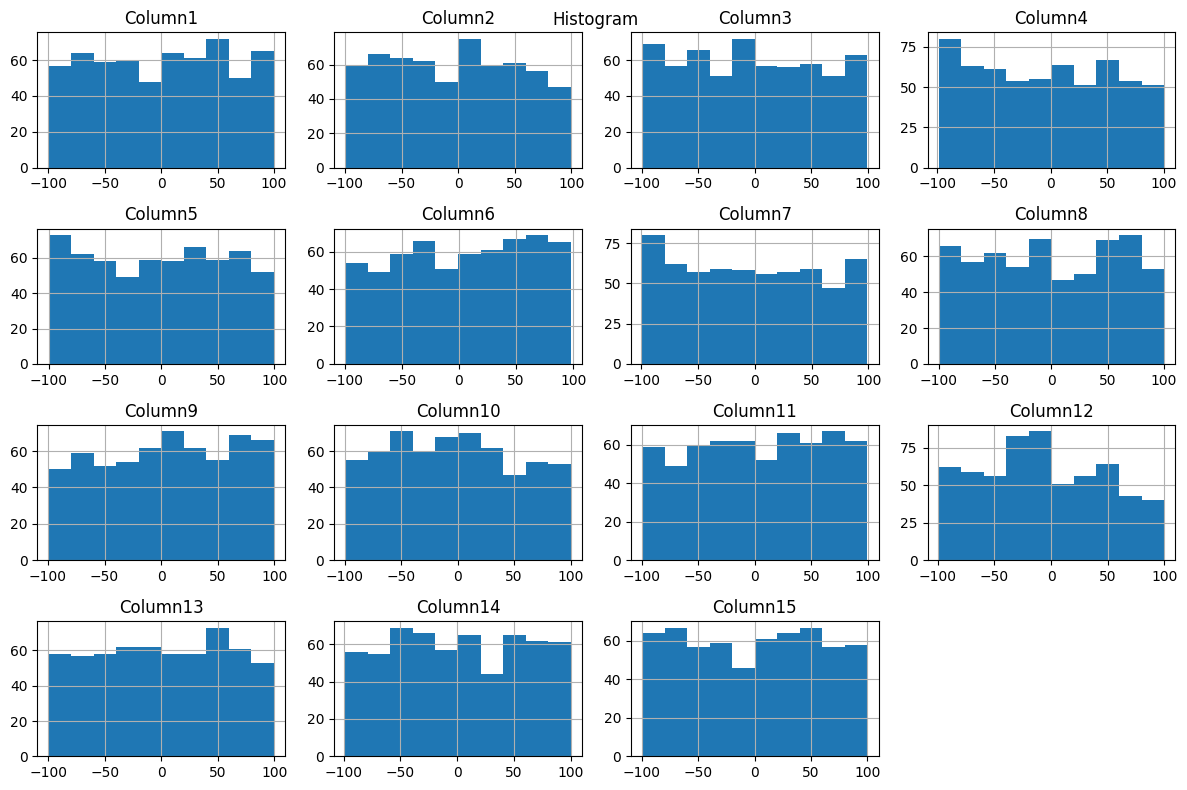

In [35]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.suptitle('Histogram')
plt.show()

(iii) Box plot of each column in a single graph

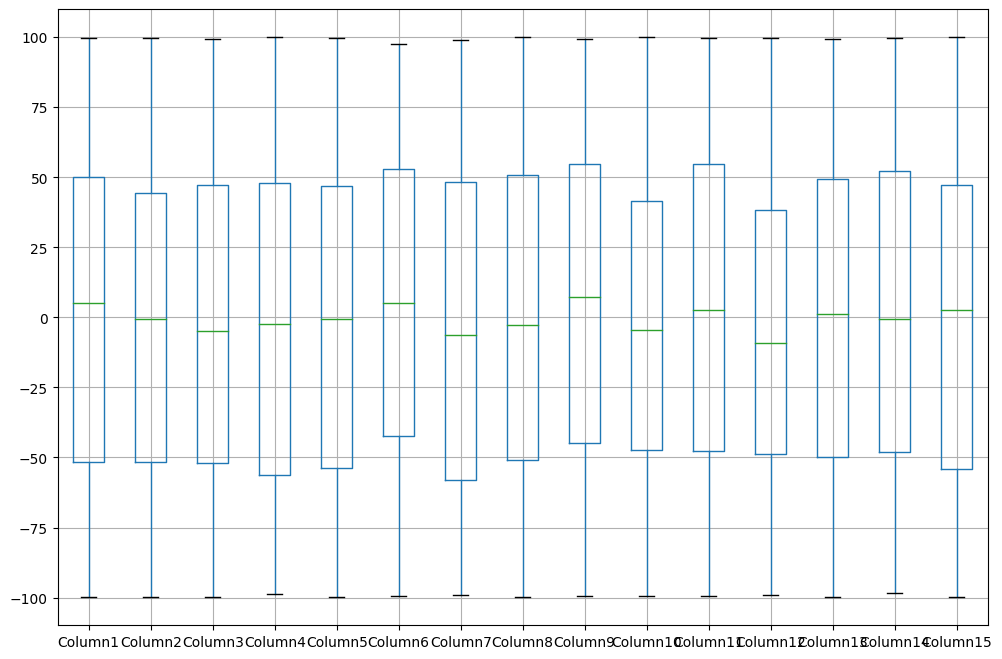

In [40]:
df.boxplot(figsize=(12,8))
plt.show()

# Q 15

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp,wilcoxon,ttest_ind,ranksums
np.random.seed(50)

In [48]:
data = np.random.uniform(5,10,size = (500,5))
columns = [f'Column{i}' for i in range (1,6)]
df = pd.DataFrame(data,columns=columns)

Perform t-Test on each column

In [51]:
t_test_results = {}
for column in df.columns:
    t_statistic, p_value = ttest_1samp(df[column], df[column].mean())
    t_test_results[column] = {'t-statistic': t_statistic, 'p-value': p_value}

(ii) Perform Wilcoxon Signed Rank Test on each column

In [52]:
wilcoxon_results = {}
for column in df.columns:
    statistic, p_value = wilcoxon(df[column] - df[column].mean())
    wilcoxon_results[column] = {'statistic': statistic, 'p-value': p_value}

(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [53]:
ttest_ind_result = ttest_ind(df.iloc[:, 2], df.iloc[:, 3])
ranksums_result = ranksums(df.iloc[:, 2], df.iloc[:, 3])

Print

In [54]:
print('(i) t-Test results:')
for column, result in t_test_results.items():
    print(f'{column}: t-statistic={result["t-statistic"]:.4f}, p-value={result["p-value"]:.4f}')
print('\n(ii) Wilcoxon Signed Rank Test results:')
for column, result in wilcoxon_results.items():
    print(f'{column}: statistic={result["statistic"]:.4f}, p-value={result["p-value"]:.4f}')
print('\n(iii) Two Sample t-Test and Wilcoxon Rank Sum Test results:')
print(f'Two Sample t-Test: t-statistic={ttest_ind_result.statistic:.4f}, p-value={ttest_ind_result.pvalue:.4f}')
print(f'Wilcoxon Rank Sum Test: statistic={ranksums_result.statistic:.4f}, p-value={ranksums_result.pvalue:.4f}')

(i) t-Test results:
Column1: t-statistic=0.0000, p-value=1.0000
Column2: t-statistic=0.0000, p-value=1.0000
Column3: t-statistic=0.0000, p-value=1.0000
Column4: t-statistic=0.0000, p-value=1.0000
Column5: t-statistic=0.0000, p-value=1.0000

(ii) Wilcoxon Signed Rank Test results:
Column1: statistic=62593.0000, p-value=0.9921
Column2: statistic=62541.0000, p-value=0.9793
Column3: statistic=62578.0000, p-value=0.9884
Column4: statistic=62567.0000, p-value=0.9857
Column5: statistic=62510.0000, p-value=0.9716

(iii) Two Sample t-Test and Wilcoxon Rank Sum Test results:
Two Sample t-Test: t-statistic=-0.2638, p-value=0.7920
Wilcoxon Rank Sum Test: statistic=-0.2637, p-value=0.7920
